<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/ConvexHull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.7 MB/s eta 0:00:00


In [2]:
import numpy as np
from jarvis.core.composition import Composition
from jarvis.db.figshare import data
%matplotlib inline
import matplotlib.pyplot as plt

dataset = data("dft_3d")

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:02<00:00, 18.0MiB/s]


Loading the zipfile...
Loading completed.


<Axes: xlabel='Ni', ylabel='energy [eV/atom]'>

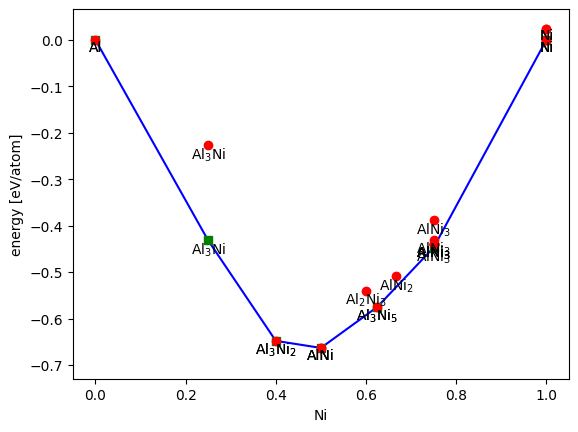

In [52]:
from jarvis.analysis.thermodynamics.energetics import PhaseDiagram
system=['Ni','Al']
z=[]
formulas=[]
ids=[]
for i in dataset:
    formula = i["formula"]
    comp = Composition.from_string(formula)
    atom_frac = comp.atomic_fraction
    all_elms = list(comp.to_dict())
    if (set(all_elms)).issubset(set(system)):
        z.append([i['formula'],i['formation_energy_peratom'],i['jid']])
        formulas.append(formula)
        ids.append(i['jid'])

pdj=PhaseDiagram(z)
pdj.plot()

In [51]:
len(x),len(z)

(28, 28)

In [56]:
import plotly.graph_objects as go
import pandas as pd

        (x, e, names, hull, simplices, xlabel, ylabel) = pdj.plot2d2()

        names = [i.replace('$', '').replace('{', '').replace('}', '').replace('_', '') for i in names]

        xlabel = pdj.symbols[1]
        ylabel = "energy [eV/atom]"
        extra = -min(e) / 10

        # Convert data into a DataFrame for easier indexing
        data = pd.DataFrame({'x': x, 'e': e, 'hull': hull, 'name': names, 'ehull': e,'ids':ids})

        # Initialize the figure
        fig = go.Figure()

        # Add hull points
        fig.add_trace(go.Scatter(
            x=data.loc[data['hull'], 'x'],  # Select x values for hull points
            y=data.loc[data['hull'], 'e'],  # Select energy values for hull points
            mode="markers",
            marker=dict(symbol="square", size=10, color="green"),
            name="Hull Points",
            hoverinfo="text",
            text=[
                f"Formula: {row['name']}<br>Formation Energy: {row['ehull']:.2f} eV/atom <br>ID: {row['ids']}"
                for _, row in data.loc[~data['hull']].iterrows()
            ],  # Show formula and actual hull energy
            showlegend=True
        ))

        # Add simplices (lines connecting hull points)
        for i, j in simplices:
            fig.add_trace(go.Scatter(
                x=[x[i], x[j]],
                y=[e[i], e[j]],
                mode="lines",
                line=dict(color="blue"),
                name="Hull Lines",
                hoverinfo="skip",
                showlegend=False
            ))

        # Add off-hull points
        fig.add_trace(go.Scatter(
            x=data.loc[~data['hull'], 'x'],  # Select x values for off-hull points
            y=data.loc[~data['hull'], 'e'],  # Select energy values for off-hull points
            mode="markers",
            marker=dict(symbol="circle", size=10, color="red"),
            name="Unstable Points",
            hoverinfo="text",
            text=[
                f"Formula: {row['name']}<br>Formation Energy: {row['ehull']:.2f} eV/atom <br>ID: {row['ids']}"
                for _, row in data.loc[~data['hull']].iterrows()
            ],  # Show formula and actual hull energy
            visible=True,
            showlegend=True
        ))

        # Add text annotations for points below the extra threshold
        for index, row in data.iterrows():
            if row['e'] <= extra:
                fig.add_trace(go.Scatter(
                    x=[row['x']],
                    y=[row['e']],
                    mode="text",
                    text=[row['name']],
                    textposition="top center",
                    showlegend=False
                ))

        # Add a button to show/hide the red unstable points
        fig.update_layout(
            xaxis_title=xlabel,
            yaxis_title=ylabel,
            yaxis_range=[min(e) - extra, extra],
            title="Energy Hull Plot",
            hovermode="closest"
        )

        # Show the plot
        fig.show()
        htm=fig.to_html()

In [5]:
x

array([0.        , 1.        , 0.625     , 0.75      , 0.75      ,
       0.        , 0.4       , 0.5       , 0.75      , 0.6       ,
       0.25      , 0.75      , 0.75      , 1.        , 0.5       ,
       0.75      , 0.66666667, 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.5       , 0.4       ,
       0.625     , 0.25      , 0.75      ])

In [6]:
e

array([-0.00000e+00,  0.00000e+00, -5.75050e-01, -4.38430e-01,
       -4.38440e-01,  3.30739e+00, -6.48010e-01, -6.62820e-01,
       -4.30870e-01, -5.40130e-01, -4.31820e-01, -3.88380e-01,
       -4.38430e-01,  1.90000e-04, -6.63230e-01, -4.38510e-01,
       -5.08930e-01,  2.43900e-02,  9.62800e-02,  9.58900e-02,
        2.43900e-02, -0.00000e+00, -0.00000e+00, -6.62820e-01,
       -6.48010e-01, -5.75050e-01, -2.27240e-01, -4.47140e-01])

In [20]:
import plotly.graph_objects as go
import pandas as pd



xlabel = pdj.symbols[1]
ylabel = "energy [eV/atom]"
extra = -min(e) / 10

# Initialize the figure
fig = go.Figure()

# Add hull points
fig.add_trace(go.Scatter(
    x=x[hull],
    y=e[hull],
    mode="markers",
    marker=dict(symbol="square", size=10, color="green"),
    name="Hull Points",
    hoverinfo="skip",  # Hide hover info for hull points
    showlegend=False
))

# Add simplices (lines connecting hull points)
for i, j in simplices:
    fig.add_trace(go.Scatter(
        x=[x[i], x[j]],
        y=[e[i], e[j]],
        mode="lines",
        line=dict(color="blue"),
        name="Hull Lines",
        hoverinfo="skip",  # No hover for simplices
        showlegend=False
    ))

# Add off-hull points
fig.add_trace(go.Scatter(
    x=x[~hull],
    y=e[~hull],
    mode="markers",
    marker=dict(symbol="circle", size=10, color="red"),
    name="Off Hull Points",
    hoverinfo="skip",  # Hide hover info for off-hull points
    showlegend=False
))

# Add text annotations for points below the extra threshold
for a, b, name in zip(x, e, names):
    if b <= extra:
        fig.add_trace(go.Scatter(
            x=[a],
            y=[b],
            mode="text",
            text=[name],
            textposition="top center",
            showlegend=False
        ))

# Update layout
fig.update_layout(
    xaxis_title=xlabel,
    yaxis_title=ylabel,
    yaxis_range=[min(e) - extra, extra],
    title="Energy Hull Plot",
    hovermode="closest",
    showlegend=False  # Hides the legend entirely
)

# Show the plot
fig.show()


In [23]:
import plotly.graph_objects as go
import pandas as pd

(x, e, names, hull, simplices, xlabel, ylabel)=pdj.plot2d2()


xlabel = pdj.symbols[1]
ylabel = "energy [eV/atom]"
extra = -min(e) / 10

# Initialize the figure
fig = go.Figure()

# Add hull points
fig.add_trace(go.Scatter(
    x=x[hull],
    y=e[hull],
    mode="markers",
    marker=dict(symbol="square", size=10, color="green"),
    name="Hull Points",
    hoverinfo="text",
    text=[f"Formula: {name}" for name in names[hull]],  # Show formula names
    showlegend=True
))

# Add simplices (lines connecting hull points)
for i, j in simplices:
    fig.add_trace(go.Scatter(
        x=[x[i], x[j]],
        y=[e[i], e[j]],
        mode="lines",
        line=dict(color="blue"),
        name="Hull Lines",
        hoverinfo="skip",  # No hover for simplices
        showlegend=False
    ))

# Add off-hull points (red unstable points)
fig.add_trace(go.Scatter(
    x=x[~hull],
    y=e[~hull],
    mode="markers",
    marker=dict(symbol="circle", size=10, color="red"),
    name="Unstable Points",
    hoverinfo="text",
    text=[f"Formula: {name}" for name in names[~hull]],  # Show formula names
    visible=True,  # Initially visible
    showlegend=True
))

# Add text annotations for points below the extra threshold
for a, b, name in zip(x, e, names):
    if b <= extra:
        fig.add_trace(go.Scatter(
            x=[a],
            y=[b],
            mode="text",
            text=[name],
            textposition="top center",
            showlegend=False
        ))

# Add a button to show/hide the red unstable points
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=[
                dict(
                    args=[{"visible": [True, True, True]}],  # Show all traces
                    label="Show Unstable Points",
                    method="update"
                ),
                dict(
                    args=[{"visible": [True, True, False]}],  # Hide unstable points
                    label="Hide Unstable Points",
                    method="update"
                )
            ],
            showactive=True,
            x=0.5,
            y=1.15,
            xanchor="center",
            yanchor="top"
        )
    ],
    xaxis_title=xlabel,
    yaxis_title=ylabel,
    yaxis_range=[min(e) - extra, extra],
    title="Energy Hull Plot",
    hovermode="closest"
)

# Show the plot
fig.show()


TypeError: only integer scalar arrays can be converted to a scalar index

In [38]:
data.loc[data['hull'], 'name']

,name
0,Al
1,Ni
2,Al3Ni5
6,Al3Ni2
10,Al3Ni
14,AlNi
27,AlNi3


In [39]:
import plotly.graph_objects as go
import pandas as pd
(x, e, names, hull, simplices, xlabel, ylabel)=pdj.plot2d2()


names=[i.replace('$','').replace('{','').replace('}','').replace('_','') for i in names]

xlabel = pdj.symbols[1]
ylabel = "energy [eV/atom]"
extra = -min(e) / 10

# Convert data into a DataFrame for easier indexing
data = pd.DataFrame({'x': x, 'e': e, 'hull': hull, 'name': names})

# Initialize the figure
fig = go.Figure()

# Add hull points
fig.add_trace(go.Scatter(
    x=data.loc[data['hull'], 'x'],  # Select x values for hull points
    y=data.loc[data['hull'], 'e'],  # Select energy values for hull points
    mode="markers",
    marker=dict(symbol="square", size=10, color="green"),
    name="Hull Points",
    hoverinfo="text",
    text=[f"Formula: {name}" for name in data.loc[data['hull'], 'name']],  # Show formula names

    showlegend=True
))

# Add simplices (lines connecting hull points)
for i, j in simplices:
    fig.add_trace(go.Scatter(
        x=[x[i], x[j]],
        y=[e[i], e[j]],
        mode="lines",
        line=dict(color="blue"),
        name="Hull Lines",
        hoverinfo="skip",
        showlegend=False
    ))

# Add off-hull points
fig.add_trace(go.Scatter(
    x=data.loc[~data['hull'], 'x'],  # Select x values for off-hull points
    y=data.loc[~data['hull'], 'e'],  # Select energy values for off-hull points
    mode="markers",
    marker=dict(symbol="circle", size=10, color="red"),
    name="Unstable Points",
    hoverinfo="text",
    text=[f"Formula: {name}" for name in data.loc[~data['hull'], 'name']],  # Show formula names

    visible=True,
    showlegend=True
))

# Add text annotations for points below the extra threshold
for index, row in data.iterrows():
    if row['e'] <= extra:
        fig.add_trace(go.Scatter(
            x=[row['x']],
            y=[row['e']],
            mode="text",
            text=[row['name']],
            textposition="top center",
            showlegend=False
        ))

# Add a button to show/hide the red unstable points
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=[
                dict(
                    args=[{"visible": [True, True, True]}],
                    label="Show Unstable Points",
                    method="update"
                ),
                dict(
                    args=[{"visible": [True, True, False]}],
                    label="Hide Unstable Points",
                    method="update"
                )
            ],
            showactive=True,
            x=0.5,
            y=1.15,
            xanchor="center",
            yanchor="top"
        )
    ],
    xaxis_title=xlabel,
    yaxis_title=ylabel,
    yaxis_range=[min(e) - extra, extra],
    title="Energy Hull Plot",
    hovermode="closest"
)

# Show the plot
fig.show()


In [40]:
import plotly.graph_objects as go
import pandas as pd

(x, e, names, hull, simplices, xlabel, ylabel) = pdj.plot2d2()

names = [i.replace('$', '').replace('{', '').replace('}', '').replace('_', '') for i in names]

xlabel = pdj.symbols[1]
ylabel = "energy [eV/atom]"
extra = -min(e) / 10

# Convert data into a DataFrame for easier indexing
data = pd.DataFrame({'x': x, 'e': e, 'hull': hull, 'name': names})

# Initialize the figure
fig = go.Figure()

# Add hull points
fig.add_trace(go.Scatter(
    x=data.loc[data['hull'], 'x'],  # Select x values for hull points
    y=data.loc[data['hull'], 'e'],  # Select energy values for hull points
    mode="markers",
    marker=dict(symbol="square", size=10, color="green"),
    name="Hull Points",
    hoverinfo="text",
    text=[
        f"Formula: {row['name']}<br>Status: Hull"
        for _, row in data.loc[data['hull']].iterrows()
    ],  # Show formula names and hull status
    showlegend=True
))

# Add simplices (lines connecting hull points)
for i, j in simplices:
    fig.add_trace(go.Scatter(
        x=[x[i], x[j]],
        y=[e[i], e[j]],
        mode="lines",
        line=dict(color="blue"),
        name="Hull Lines",
        hoverinfo="skip",
        showlegend=False
    ))

# Add off-hull points
fig.add_trace(go.Scatter(
    x=data.loc[~data['hull'], 'x'],  # Select x values for off-hull points
    y=data.loc[~data['hull'], 'e'],  # Select energy values for off-hull points
    mode="markers",
    marker=dict(symbol="circle", size=10, color="red"),
    name="Unstable Points",
    hoverinfo="text",
    text=[
        f"Formula: {row['name']}<br>Status: Off-Hull"
        for _, row in data.loc[~data['hull']].iterrows()
    ],  # Show formula names and off-hull status
    visible=True,
    showlegend=True
))

# Add text annotations for points below the extra threshold
for index, row in data.iterrows():
    if row['e'] <= extra:
        fig.add_trace(go.Scatter(
            x=[row['x']],
            y=[row['e']],
            mode="text",
            text=[row['name']],
            textposition="top center",
            showlegend=False
        ))

# Add a button to show/hide the red unstable points
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=[
                dict(
                    args=[{"visible": [True, True, True]}],
                    label="Show Unstable Points",
                    method="update"
                ),
                dict(
                    args=[{"visible": [True, True, False]}],
                    label="Hide Unstable Points",
                    method="update"
                )
            ],
            showactive=True,
            x=0.5,
            y=1.15,
            xanchor="center",
            yanchor="top"
        )
    ],
    xaxis_title=xlabel,
    yaxis_title=ylabel,
    yaxis_range=[min(e) - extra, extra],
    title="Energy Hull Plot",
    hovermode="closest"
)

# Show the plot
fig.show()


In [47]:
x,e,hull

(array([0.        , 1.        , 0.625     , 0.75      , 0.75      ,
        0.        , 0.4       , 0.5       , 0.75      , 0.6       ,
        0.25      , 0.75      , 0.75      , 1.        , 0.5       ,
        0.75      , 0.66666667, 1.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.5       , 0.4       ,
        0.625     , 0.25      , 0.75      ]),
 array([-0.00000e+00,  0.00000e+00, -5.75050e-01, -4.38430e-01,
        -4.38440e-01,  3.30739e+00, -6.48010e-01, -6.62820e-01,
        -4.30870e-01, -5.40130e-01, -4.31820e-01, -3.88380e-01,
        -4.38430e-01,  1.90000e-04, -6.63230e-01, -4.38510e-01,
        -5.08930e-01,  2.43900e-02,  9.62800e-02,  9.58900e-02,
         2.43900e-02, -0.00000e+00, -0.00000e+00, -6.62820e-01,
        -6.48010e-01, -5.75050e-01, -2.27240e-01, -4.47140e-01]),
 array([ True,  True,  True, False, False, False,  True, False, False,
        False,  True, False, False, False,  True, False, False, False,
        False, False, 

In [25]:
names

['Al',
 'Ni',
 'Al$_{3}$Ni$_{5}$',
 'AlNi$_{3}$',
 'AlNi$_{3}$',
 'Al',
 'Al$_{3}$Ni$_{2}$',
 'AlNi',
 'AlNi$_{3}$',
 'Al$_{2}$Ni$_{3}$',
 'Al$_{3}$Ni',
 'AlNi$_{3}$',
 'AlNi$_{3}$',
 'Ni',
 'AlNi',
 'AlNi$_{3}$',
 'AlNi$_{2}$',
 'Ni',
 'Ni',
 'Al',
 'Ni',
 'Al',
 'Ni',
 'AlNi',
 'Al$_{3}$Ni$_{2}$',
 'Al$_{3}$Ni$_{5}$',
 'Al$_{3}$Ni',
 'AlNi$_{3}$']

In [26]:
import plotly.graph_objects as go
import pandas as pd
(x, e, names, hull, simplices, xlabel, ylabel)=pdj.plot2d2()

names=[i.replace('$','').replace('{','').replace('}','').replace('_','') for i in names]

xlabel = pdj.symbols[1]
ylabel = "energy [eV/atom]"
extra = -min(e) / 10

# Initialize the figure
fig = go.Figure()

# Add hull points
fig.add_trace(go.Scatter(
    x=x[hull],
    y=e[hull],
    mode="markers",
    marker=dict(symbol="square", size=10, color="green"),
    name="Hull Points",
    hovertemplate="x: %{x}<br>Energy: %{y}<br>Hull"
))

# Add simplices (lines connecting hull points)
for i, j in simplices:
    fig.add_trace(go.Scatter(
        x=[x[i], x[j]],
        y=[e[i], e[j]],
        mode="lines",
        line=dict(color="blue"),
        #name="Hull Lines",
        hoverinfo="skip"  # No hover for simplices
    ))

# Add text for points below the extra threshold
for a, b, name in zip(x, e, names):
    if b <= extra:
        fig.add_trace(go.Scatter(
            x=[a],
            y=[b],
            mode="text",
            text=[name],
            textposition="top center",
            showlegend=False
        ))

# Update layout
fig.update_layout(
    xaxis_title=xlabel,
    yaxis_title=ylabel,
    yaxis_range=[min(e) - extra, extra],
    title="Plot with Hull and Hover Data",
    hovermode="closest"
)

# Show the plot
fig.show()


(-0.729553, 0.066323)

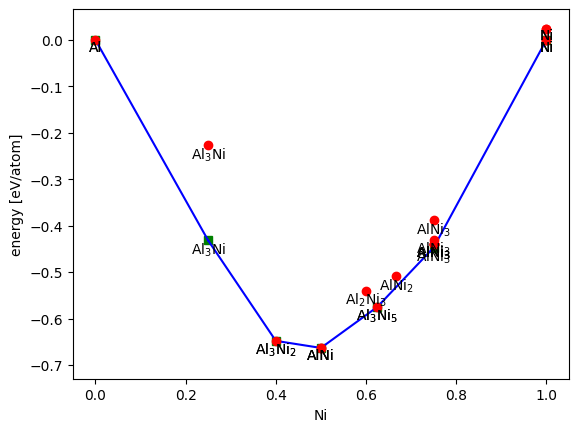

In [19]:
extra = -min(e) / 10
hull = pdj.hull
plt.plot(x[hull], e[hull], "sg")
for i, j in simplices:
    plt.plot(x[[i, j]], e[[i, j]], "-b")
for a, b, name in zip(x, e, names):
    if b <= extra:
        plt.text(a, b, name, ha="center", va="top")

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(x[~hull], e[~hull], "or")
xlabel = pdj.symbols[1]
ylabel = "energy [eV/atom]"
plt.ylim([min(e) - extra, extra])

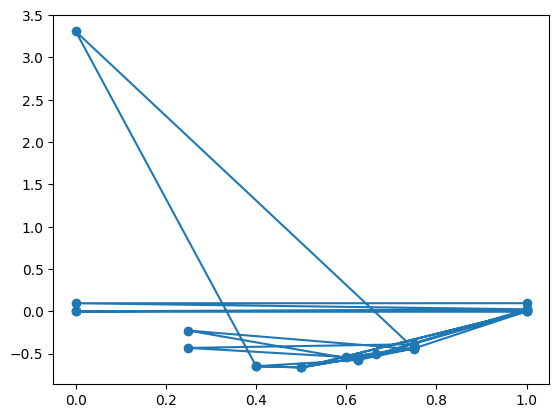

In [8]:
plt.plot(x,e,'-o')

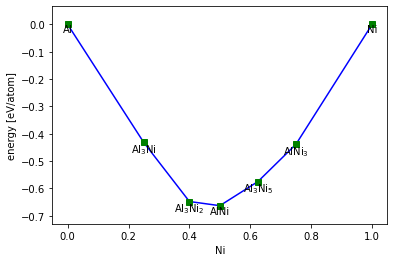

In [ ]:
pdj=PhaseDiagram(z,only_plot_stable=True)
pdj.plot()

<Axes: >

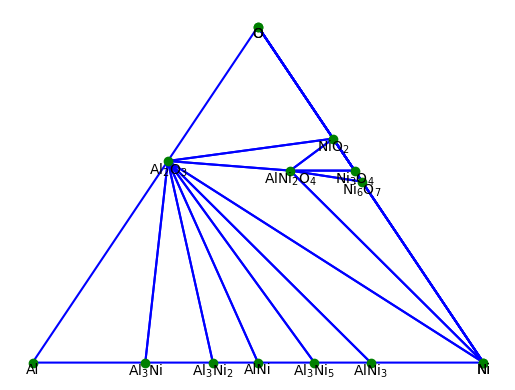

In [80]:
from jarvis.analysis.thermodynamics.energetics import PhaseDiagram
system=['Ni','Al','O']
z=[]
ids=[]
for i in dataset:
    formula = i["formula"]
    comp = Composition.from_string(formula)
    atom_frac = comp.atomic_fraction
    all_elms = list(comp.to_dict())
    if (set(all_elms)).issubset(set(system)):
        z.append([i['formula'],i['formation_energy_peratom'],i['jid']])
        ids.append(i['jid'])

pdj=PhaseDiagram(z,only_plot_stable=True)
pdj.plot()

(-0.05, 1.05, -0.04330127018922193, 0.9093266739736605)

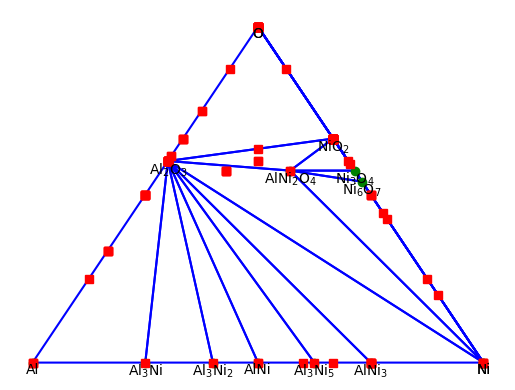

In [71]:
import re
x, y = pdj.points[:, 1:-1].T.copy()
x += y / 2
y *= 3 ** 0.5 / 2
names = [
    re.sub(r"(\d+)", r"$_{\1}$", ref[2]) for ref in pdj.entries_dict
]
hull = pdj.hull
simplices = pdj.simplices


for i, j, k in simplices:
    plt.plot(x[[i, j, k, i]], y[[i, j, k, i]], "-b")
plt.plot(x[hull], y[hull], "og")

plt.plot(x[~hull], y[~hull], "sr")
x = x[pdj.hull]
y = y[pdj.hull]
names = [name for name, h in zip(names, pdj.hull) if h]
for a, b, name in zip(x, y, names):
    plt.text(a, b, name, ha="center", va="top")
plt.xticks([])
plt.yticks([])
plt.axis("off")

In [82]:
        import plotly.graph_objects as go
        import re
        import numpy as np

        # Extract data
        x, y = pdj.points[:, 1:-1].T.copy()
        x += y / 2
        y *= 3 ** 0.5 / 2

        names = [
            re.sub(r"(\d+)", r"$_{\1}$", ref[2]) for ref in pdj.entries_dict
        ]
        names=[i.replace('$','').replace('{','').replace('}','').replace('_','') for i in names]

        hull = pdj.hull
        simplices = pdj.simplices

        # Create a Plotly figure
        fig = go.Figure()

        # Add simplices (triangles connecting hull points)
        for i, j, k in simplices:
            fig.add_trace(go.Scatter(
                x=[x[i], x[j], x[k], x[i]],  # Close the triangle by adding the first point again
                y=[y[i], y[j], y[k], y[i]],
                mode="lines",
                line=dict(color="blue"),
                name="Simplex",
                hoverinfo="skip",
                showlegend=False
            ))

        # Add hull points
        fig.add_trace(go.Scatter(
            x=x[hull],
            y=y[hull],
            mode="markers",
            marker=dict(symbol="circle", size=10, color="green"),
            name="Hull Points",
            hoverinfo="text",
            text=[
                f"Formula: {name}<br>Hull Energy: {pdj.entries[i][1]:.2f} eV/atom<br>{ids[i]}"
                for i, (name, h) in enumerate(zip(names, hull)) if h
            ], # Annotate with formula names
            showlegend=True
        ))

        # Add off-hull points
        fig.add_trace(go.Scatter(
            x=x[~hull],
            y=y[~hull],
            mode="markers",
            marker=dict(symbol="square", size=10, color="red"),
            name="Unstable Points",
            hoverinfo="text",
            text=[
                f"Formula: {name}<br>Hull Energy: {pdj.entries[i][1]:.2f} eV/atom<br>{ids[i]}"
                for i, (name, h) in enumerate(zip(names, ~hull)) if h
            ], # Annotate with formula names
            showlegend=True
        ))

        # Add text annotations for hull points
        for a, b, name in zip(x[hull], y[hull], [name for name, h in zip(names, hull) if h]):
            fig.add_trace(go.Scatter(
                x=[a],
                y=[b],
                mode="text",
                text=[name],
                textposition="top center",
                showlegend=False
            ))

        # Style the plot
        fig.update_layout(
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            title="",
            hovermode="closest",
            showlegend=True
        )

        # Show the plot
        fig.show()


<Axes3D: >

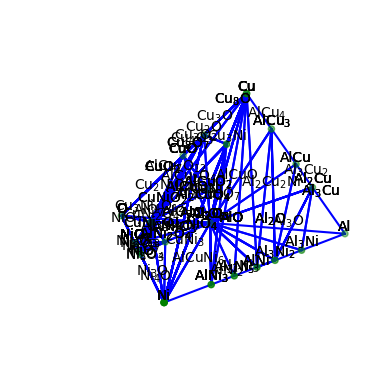

In [90]:
from jarvis.analysis.thermodynamics.energetics import PhaseDiagram
system=['Ni','Al','O','Cu']
z=[]
ids=[]
for i in dataset:
    formula = i["formula"]
    comp = Composition.from_string(formula)
    atom_frac = comp.atomic_fraction
    all_elms = list(comp.to_dict())
    if (set(all_elms)).issubset(set(system)):
        z.append([i['formula'],i['formation_energy_peratom'],i['jid']])
        ids.append(i['jid'])

pdj=PhaseDiagram(z,only_plot_stable=True)
pdj.plot()

In [92]:
    import plotly.graph_objects as go
    import numpy as np
    import re

    # Data
    x, y, z = pdj.points[:, 1:-1].T
    a = x / 2 + y + z / 2
    b = 3 ** 0.5 * (x / 2 + y / 6)
    c = (2 / 3) ** 0.5 * z
    hull = pdj.hull
    simplices = pdj.simplices

    # Process names for annotations
    names = [re.sub(r"(\d+)", r"$_{\1}$", ref[2]) for ref in pdj.entries_dict]
    names = [
            i.replace("$", "").replace("{", "").replace("}", "").replace("_", "")
            for i in names
        ]
    # Create a 3D plot
    fig = go.Figure()

    # Add hull points
    fig.add_trace(go.Scatter3d(
        x=a[hull],
        y=b[hull],
        z=c[hull],
        mode='markers',
        marker=dict(size=5, color='green', symbol='circle'),
        name='Hull Points',
        hoverinfo='text',
        text=[
                    f"Formula: {name}<br>Hull Energy: {pdj.entries[i][1]:.2f} eV/atom<br>{ids[i]}"
                    for i, (name, h) in enumerate(zip(names, hull))
                    if h
                ],
    ))

    # Add off-hull points
    fig.add_trace(go.Scatter3d(
        x=a[~hull],
        y=b[~hull],
        z=c[~hull],
        mode='markers',
        marker=dict(size=5, color='red', symbol='square'),
        name='Unstable Points',
        hoverinfo='text',
        text=[
                    f"Formula: {name}<br>Hull Energy: {pdj.entries[i][1]:.2f} eV/atom<br>{ids[i]}"
                    for i, (name, h) in enumerate(zip(names, ~hull))
                    if h
                ],
    ))

    # Add simplices (edges of the convex hull)
    for i, j, k, w in simplices:
        fig.add_trace(go.Scatter3d(
            x=[a[i], a[j], a[k], a[i], a[w], a[k], a[j], a[w]],
            y=[b[i], b[j], b[k], b[i], b[w], b[k], b[j], b[w]],
            z=[c[i], c[j], c[k], c[i], c[w], c[k], c[j], c[w]],
            mode='lines',
            line=dict(color='blue'),
            name='Simplex',
            hoverinfo='skip',
            showlegend=False
        ))

    # Add text annotations
    for x_, y_, z_, name in zip(a, b, c, names):
        fig.add_trace(go.Scatter3d(
            x=[x_],
            y=[y_],
            z=[z_],
            mode='text',
            text=[name],
            textposition='bottom center',
            showlegend=False
        ))

    # Style the plot
    fig.update_layout(
        scene=dict(
            xaxis=dict(range=[0, 1], showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(range=[0, 1], showgrid=False, zeroline=False, showticklabels=False),
            zaxis=dict(range=[0, 1], showgrid=False, zeroline=False, showticklabels=False),
            aspectmode='cube',  # Make axes aspect ratio 1:1:1
        ),
        title="",
        showlegend=True,
        hovermode="closest"
    )
    fig.update_layout(
        scene=dict(
            xaxis=dict(
                title='',  # Hide X-axis label
                showgrid=False,  # Optional: Remove gridlines
                zeroline=False,  # Optional: Remove zero line
                showticklabels=False  # Optional: Remove tick labels
            ),
            yaxis=dict(
                title='',  # Hide Y-axis label
                showgrid=False,
                zeroline=False,
                showticklabels=False
            ),
            zaxis=dict(
                title='',  # Hide Z-axis label
                showgrid=False,
                zeroline=False,
                showticklabels=False
            )
        )
    )

    # Show the plot
    fig.show()


AttributeError: Line2D.set() got an unexpected keyword argument 'zs'

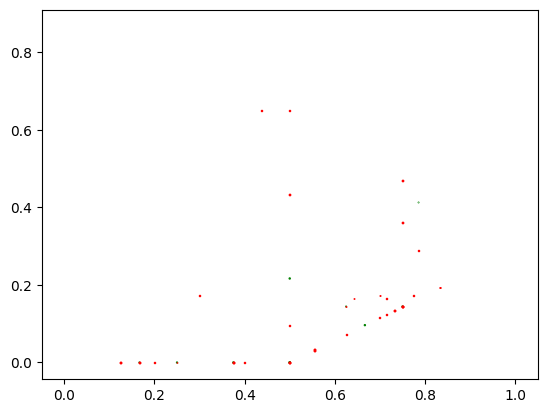

In [85]:
x, y, z = pdj.points[:, 1:-1].T
a = x / 2 + y + z / 2
b = 3 ** 0.5 * (x / 2 + y / 6)
c = (2 / 3) ** 0.5 * z

plt.scatter(a[pdj.hull], b[pdj.hull], c[pdj.hull], c="g", marker="o")

plt.scatter(
    a[~pdj.hull], b[~pdj.hull], c[~pdj.hull], c="r", marker="s"
)

for x, y, z, ref in zip(a, b, c, pdj.entries_dict):
    name = re.sub(r"(\d+)", r"$_{\1}$", ref[2])
    plt.text(x, y, z, name, ha="center", va="bottom")

for i, j, k, w in pdj.simplices:
    plt.plot(
        a[[i, j, k, i, w, k, j, w]],
        b[[i, j, k, i, w, k, j, w]],
        zs=c[[i, j, k, i, w, k, j, w]],
        c="b",
    )

plt.xlim3d(0, 1)
plt.ylim3d(0, 1)
plt.zlim3d(0, 1)
plt.view_init(azim=115, elev=30)
plt.xticks([])
plt.yticks([])
plt.axis("off")

In [ ]:
from jarvis.analysis.thermodynamics.energetics import jid_hull

jid='JVASP-1067'
jid_hull(jid=jid,dataset=dataset)

[['Bi2Se3', -0.40429, 'JVASP-1067'], 0.0]

In [ ]:
#DEPRECATED CODE BELOW
import plotly.express as px
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
from jarvis.core.composition import Composition
from jarvis.db.figshare import data

dft_3d = data("dft_3d")

def convex_hull_plot(
    my_data=dft_3d,
    system="Ni-Al",
    show_ehull=True,
    show_stable_labels_only=False,
):
    """Get Con hull, requires my_data as array of dict[{formula,fenp,jid},...]."""
    spec = system.split("-")
    elemental = {}
    mix = {}
    texts = []
    gen = []
    gen.append([0, 0])
    gen.append([1, 0])
    for i in my_data:
        formula = i["formula"]
        comp = Composition.from_string(formula)
        atom_frac = comp.atomic_fraction
        all_elms = list(comp.to_dict())
        # print (comp.to_dict())
        enp = i["formation_energy_peratom"]

        if len(set(all_elms)) == 1 and all_elms[0] in spec:
            elm = all_elms[0]
            # print (elm,enp)
            if elm in elemental and elemental[elm] > enp:
                elemental[elm] = enp
            else:
                elemental[elm] = enp
    for i in my_data:
        formula = i["formula"]
        comp = Composition.from_string(formula)
        atom_frac = comp.atomic_fraction
        all_elms = list(comp.to_dict())
        # print (comp.to_dict())

        if (set(all_elms)) == set(spec):
            mix[atom_frac[spec[0]]] = i["formation_energy_peratom"]
            texts.append(
                [
                    atom_frac[spec[0]],
                    i["formation_energy_peratom"],
                    formula,

                    i['jid']
                ]
            )
            gen.append([atom_frac[spec[0]], i["formation_energy_peratom"]])

    for i in my_data:
        formula = i["formula"]

        if formula==spec[0] and i["formation_energy_peratom"]==0:
            texts.append([0, 0.01, spec[0],i['jid']])

        if formula==spec[1]and i["formation_energy_peratom"]==0:
            texts.append([1, 0.01, spec[1],i['jid']])

    # texts.append([0, 0.01, spec[0]])
    # texts.append([1, 0.01, spec[1]])

    gen = np.array(gen)
    hull = ConvexHull(points=gen)
    print (hull.vertices)
    stable_points = hull.vertices

    stable_point_energies = {}
    def get_dist(p1=np.array([0,0]),p2=np.array([.4,-.4]),xp=np.array([.33,-.22])):
        p1=np.array(p1)
        p2=np.array(p2)
        return np.linalg.norm(np.cross(p2-p1, p1-xp))/np.linalg.norm(p2-p1)
    def get_min_dist(xp=[],gen=gen,stable_points=stable_points):
      xp=np.array(xp)
      all_dists=[]
      for i in gen[stable_points]:
        for j in gen[stable_points]:
          if i[0]!=j[0] and i[1]!=j[1]:
            p1=[i[0],i[1]]
            p2=[j[0],j[1]]
            dist=get_dist(p1=p1,p2=p2,xp=xp)

            all_dists.append(dist)
      return min(all_dists)

    #get_min_dist()
    for i in stable_points:
        if texts[i + 2][1] < 0:
            stable_point_energies[texts[i + 2][0]] = texts[i + 2][1]


    fig = px.scatter(x=gen[:, 0], y=gen[:, 1],color=["red" for i in range(len(gen[:,0]))])
    for i, simplex in enumerate(hull.simplices):
        if gen[simplex, 1][0] < 0:

            fig.add_scatter(
                x=gen[simplex, 0], y=gen[simplex, 1], line_color="blue"
            )

    for ii, i in enumerate(texts):

        if show_stable_labels_only:
            if ii + 2 in stable_points and i[1] <= 0:
              if show_ehull:
                ehull=get_min_dist(xp=[i[0],i[1]])
                hovertext=str(ehull)
              else:
                hovertext=i[3]
                fig.add_annotation(
                    x=i[0],
                    y=i[1] ,
                    text=i[2],
                    hovertext=hovertext,
                    font=dict(family="sans serif", size=18, color="green"),
                )
                fig.add_annotation(x=0,y=0,text=spec[0],font=dict(family="sans serif", size=18, color="green"))
                fig.add_annotation(x=1,y=0,text=spec[1],font=dict(family="sans serif", size=18, color="green"))

        else:
            if show_ehull:
                ehull=get_min_dist(xp=[i[0],i[1]])
                hovertext=str(ehull)
            else:
              hovertext=i[3]
            fig.add_annotation(
                x=i[0] ,
                y=i[1],
                text=i[2],
                hovertext=hovertext,
                font=dict(family="sans serif", size=18, color="green"),
            )

    fig.update_layout(
        showlegend=False,
        xaxis_title="Mol fraction:" + spec[0],
        yaxis_title="Energy difference (eV)",
    )

    fig.show(config=dict(displayModeBar=False))


convex_hull_plot(system='Ni-Al')

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:01<00:00, 16.4MiB/s]


Loading the zipfile...
Loading completed.
[ 1  0  9  5 12  2 13]
